In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [24]:
X_train.shape

(45000, 32, 32, 3)

In [25]:
X_test.shape

(10000, 32, 32, 3)

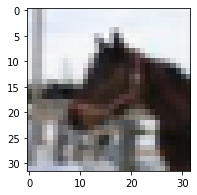

In [26]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[1],cmap="Accent_r")

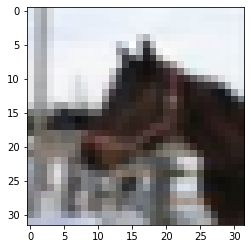

In [35]:
plt.imshow(X_train[1])
plt.show()

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
hidden=[100]*20
for n_hidden in hidden:
    model.add(keras.layers.Dense(n_hidden, activation="elu",
                                   kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [33]:
import os
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5",
                                                      save_best_only=True)
run_index =1
run_logdir = os.path.join(os.curdir, "my_cifar10_logs","run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [32]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [34]:

model.fit(X_train, y_train, epochs=100,
        validation_data=(X_valid, y_valid),
        callbacks=[early_stopping_cb, model_checkpoint_cb, tensorboard_cb])


Epoch 1/100
1407/1407 [==============================] - 24s 10ms/step - loss: 3.5798 - accuracy: 0.1726 - val_loss: 2.1035 - val_accuracy: 0.2402
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.0412 - accuracy: 0.2548 - val_loss: 1.9808 - val_accuracy: 0.2724
Epoch 3/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.9334 - accuracy: 0.2942 - val_loss: 1.8828 - val_accuracy: 0.3080
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8557 - accuracy: 0.3213 - val_loss: 1.8751 - val_accuracy: 0.3280
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7982 - accuracy: 0.3464 - val_loss: 1.7732 - val_accuracy: 0.3570
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7415 - accuracy: 0.3670 - val_loss: 1.7407 - val_accuracy: 0.3616
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7019 - accuracy: 0.3835 - val_loss: 1.7367

Epoch 57/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.1026 - accuracy: 0.6044 - val_loss: 1.5769 - val_accuracy: 0.4794
Epoch 58/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.0985 - accuracy: 0.6070 - val_loss: 1.5650 - val_accuracy: 0.4842
Epoch 59/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.0913 - accuracy: 0.6083 - val_loss: 1.5464 - val_accuracy: 0.4754
Epoch 60/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.0810 - accuracy: 0.6138 - val_loss: 1.5616 - val_accuracy: 0.4818


In [36]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.4922 - accuracy: 0.4811


[1.4922479391098022, 0.4810999929904938]

In [37]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [38]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())
hidden=[100]*20
for n_hidden in hidden:
    model.add(keras.layers.Dense(n_hidden, activation="elu",
                                   kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Dense(10, activation="softmax"))
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5",
                                                      save_best_only=True)
run_index =1
run_logdir = os.path.join(os.curdir, "my_cifar10_bn_logs","run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [39]:
model.fit(X_train, y_train, epochs=100,
        validation_data=(X_valid, y_valid),
        callbacks=[early_stopping_cb, model_checkpoint_cb, tensorboard_cb])

Epoch 1/100
1407/1407 [==============================] - 46s 15ms/step - loss: 2.2459 - accuracy: 0.2128 - val_loss: 1.9275 - val_accuracy: 0.3044
Epoch 2/100
1407/1407 [==============================] - 19s 13ms/step - loss: 1.9314 - accuracy: 0.3066 - val_loss: 1.7835 - val_accuracy: 0.3512
Epoch 3/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8312 - accuracy: 0.3399 - val_loss: 1.7069 - val_accuracy: 0.3830
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7619 - accuracy: 0.3664 - val_loss: 1.6455 - val_accuracy: 0.4040
Epoch 5/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.7114 - accuracy: 0.3863 - val_loss: 1.5965 - val_accuracy: 0.4302
Epoch 6/100
1407/1407 [==============================] - 19s 13ms/step - loss: 1.6630 - accuracy: 0.4059 - val_loss: 1.5633 - val_accuracy: 0.4398
Epoch 7/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.6221 - accuracy: 0.4202 - val_loss: 1

In [40]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.3891 - accuracy: 0.5280


[1.3891077041625977, 0.527999997138977]

In [ ]:
# this makes it much faster and a little bit more accurate

In [45]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
hidden=[100]*20
for n_hidden in hidden:
    model.add(keras.layers.Dense(n_hidden, activation="selu",
                                   kernel_initializer="lecun_normal"))
    
model.add(keras.layers.Dense(10, activation="softmax"))
optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5",
                                                      save_best_only=True)
run_index =1
run_logdir = os.path.join(os.curdir, "my_cifar10_selu_logs","run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# 各チャンネルごとにスケーリングを行う
X_train_scaled = np.zeros_like(X_train, dtype=np.float64)
X_valid_scaled= np.zeros_like(X_valid, dtype=np.float64)
X_test_scaled = np.zeros_like(X_test, dtype=np.float64)

for i in range(3):
    # X_trainのスケーリング
    channel_data = X_train[:, :, :, i]
    channel_mean = np.mean(channel_data)
    channel_std = np.std(channel_data)
    scaled_channel = (channel_data - channel_mean) / channel_std
    X_train_scaled[:, :, :, i] = scaled_channel

    # X_validのスケーリング
    channel_data = X_valid[:, :, :, i]
    scaled_channel = (channel_data - channel_mean) / channel_std
    X_valid_scaled[:, :, :, i] = scaled_channel

    # X_testのスケーリング
    channel_data = X_test[:, :, :, i]
    scaled_channel = (channel_data - channel_mean) / channel_std
    X_test_scaled[:, :, :, i] = scaled_channel


# to use selu, standardize the inputs without using batchnormalization

In [50]:
model.fit(X_train_scaled, y_train, epochs=100,
        validation_data=(X_valid_scaled, y_valid),
        callbacks=[early_stopping_cb, model_checkpoint_cb, tensorboard_cb])

Epoch 1/100
1407/1407 [==============================] - 16s 8ms/step - loss: 1.8991 - accuracy: 0.3196 - val_loss: 1.8204 - val_accuracy: 0.3502
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6922 - accuracy: 0.4025 - val_loss: 1.6752 - val_accuracy: 0.3980
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6012 - accuracy: 0.4359 - val_loss: 1.6148 - val_accuracy: 0.4396
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5415 - accuracy: 0.4571 - val_loss: 1.6363 - val_accuracy: 0.4314
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4845 - accuracy: 0.4782 - val_loss: 1.5438 - val_accuracy: 0.4632
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4349 - accuracy: 0.4972 - val_loss: 1.5047 - val_accuracy: 0.4738
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3945 - accuracy: 0.5143 - val_loss: 1.5725 -

In [52]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 2ms/step - loss: 1.4584 - accuracy: 0.5148


[1.4583555459976196, 0.5148000121116638]

In [ ]:
# this is even faster but with not much change on the accuracy

In [97]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for o in range(20):
    model.add(keras.layers.Dense(100, activation="selu",
                                   kernel_initializer="lecun_normal"))
model.add(keras.layers.AlphaDropout(rate=0.1))    
model.add(keras.layers.Dense(10, activation="softmax"))
optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5",
                                                      save_best_only=True)
run_index =1
run_logdir = os.path.join(os.curdir, "my_cifar10_alpha_dropout_logs","run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)


In [98]:
model.fit(X_train_scaled, y_train, epochs=100,
        validation_data=(X_valid_scaled, y_valid),
        callbacks=[early_stopping_cb, model_checkpoint_cb, tensorboard_cb])


Epoch 1/100
1407/1407 [==============================] - 20s 9ms/step - loss: 1.9298 - accuracy: 0.3106 - val_loss: 1.7714 - val_accuracy: 0.3690
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7137 - accuracy: 0.3914 - val_loss: 1.6765 - val_accuracy: 0.4132
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.6297 - accuracy: 0.4272 - val_loss: 1.6685 - val_accuracy: 0.4030
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5711 - accuracy: 0.4472 - val_loss: 1.6013 - val_accuracy: 0.4372
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5198 - accuracy: 0.4678 - val_loss: 1.6205 - val_accuracy: 0.4440
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4777 - accuracy: 0.4849 - val_loss: 1.5599 - val_accuracy: 0.4708
Epoch 7/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4333 - accuracy: 0.4964 - val_loss: 1.6103 -

In [5]:
X_train_scaled = np.zeros_like(X_train, dtype=np.float64)
X_valid_scaled= np.zeros_like(X_valid, dtype=np.float64)
X_test_scaled = np.zeros_like(X_test, dtype=np.float64)

for i in range(3):
    # X_trainのスケーリング
    channel_data = X_train[:, :, :, i]
    channel_mean = np.mean(channel_data)
    channel_std = np.std(channel_data)
    scaled_channel = (channel_data - channel_mean) / channel_std
    X_train_scaled[:, :, :, i] = scaled_channel

    # X_validのスケーリング
    channel_data = X_valid[:, :, :, i]
    scaled_channel = (channel_data - channel_mean) / channel_std
    X_valid_scaled[:, :, :, i] = scaled_channel

    # X_testのスケーリング
    channel_data = X_test[:, :, :, i]
    scaled_channel = (channel_data - channel_mean) / channel_std
    X_test_scaled[:, :, :, i] = scaled_channel


In [6]:
# slightly better ?
model=keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 2s 13ms/step - loss: 1.5113 - accuracy: 0.4736


[1.5113234519958496, 0.47360000014305115]

In [7]:
# MCAlphaDropout

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])
# もし現在のレイヤーがkeras.layers.AlphaDropoutのインスタンスであれば、
# 新しいレイヤーとしてMCAlphaDropout(layer.rate)を追加します。
# 上記以外の場合は、元のレイヤーをそのまま追加します。
# .rateはMCAlphaDropout

In [8]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [9]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

157/157 [==============================] - 3s 17ms/step


0.4712

In [14]:
# no accuracy improvement
# BatchNormalization model may be the best in this case
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for o in range(20):
    model.add(keras.layers.Dense(100, activation="selu",
                                   kernel_initializer="lecun_normal"))
model.add(keras.layers.AlphaDropout(rate=0.1))    
model.add(keras.layers.Dense(10, activation="softmax"))
optimizer = keras.optimizers.SGD(learning_rate=1e-3,)

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])


In [6]:
import math
K = keras.backend
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [7]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [8]:
batch_size = 128
rates , losses = find_learning_rate(model, X_train_scaled,y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0]+min(losses))/1.4])

NameError: name 'X_train_scaled' is not defined

In [1]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for o in range(20):
    model.add(keras.layers.Dense(100, activation="selu",
                                   kernel_initializer="lecun_normal"))
model.add(keras.layers.AlphaDropout(rate=0.1))    
model.add(keras.layers.Dense(10, activation="softmax"))
optimizer = keras.optimizers.SGD(learning_rate=0.1,)

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])


NameError: name 'keras' is not defined

In [10]:
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

NameError: name 'X_train' is not defined

In [ ]:
# 1cycle scheduling enables 15 short iterations training to have a high accuracy